# Importing Basic Dependencies

In [58]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

In [59]:
df = pd.read_csv('laptop_data.csv')
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,856.5442
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,574.7463
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,367.6320
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,1622.3440
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1153.1500


In [60]:
df.columns

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [61]:
# removing the unnamed: 0 col

df = df[['Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price']]
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,856.5442
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,574.7463
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,367.6320
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,1622.3440
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1153.1500


In [62]:
df.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [63]:
# checking for duplicated rows

df.duplicated().sum()

29

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


In [65]:
laptop_data = df

In [66]:
# Convert 'Ram' and 'Weight' to numerical values
laptop_data['Ram'] = laptop_data['Ram'].str.replace('GB', '').astype(int)
laptop_data['Weight'] = laptop_data['Weight'].str.replace('kg', '').astype(float)

# Check for missing values
missing_values = laptop_data.isnull().sum()

# Updated dataset and missing values info
updated_dataset_info = {
    "First Five Rows": laptop_data.head(),
    "Missing Values": missing_values
}

updated_dataset_info

{'First Five Rows':   Company   TypeName  Inches                    ScreenResolution  \
 0   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   
 1   Apple  Ultrabook    13.3                            1440x900   
 2      HP   Notebook    15.6                   Full HD 1920x1080   
 3   Apple  Ultrabook    15.4  IPS Panel Retina Display 2880x1800   
 4   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   
 
                           Cpu  Ram               Memory  \
 0        Intel Core i5 2.3GHz    8            128GB SSD   
 1        Intel Core i5 1.8GHz    8  128GB Flash Storage   
 2  Intel Core i5 7200U 2.5GHz    8            256GB SSD   
 3        Intel Core i7 2.7GHz   16            512GB SSD   
 4        Intel Core i5 3.1GHz    8            256GB SSD   
 
                             Gpu  OpSys  Weight      Price  
 0  Intel Iris Plus Graphics 640  macOS    1.37   856.5442  
 1        Intel HD Graphics 6000  macOS    1.34   574.7463  
 2         Intel HD 

C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

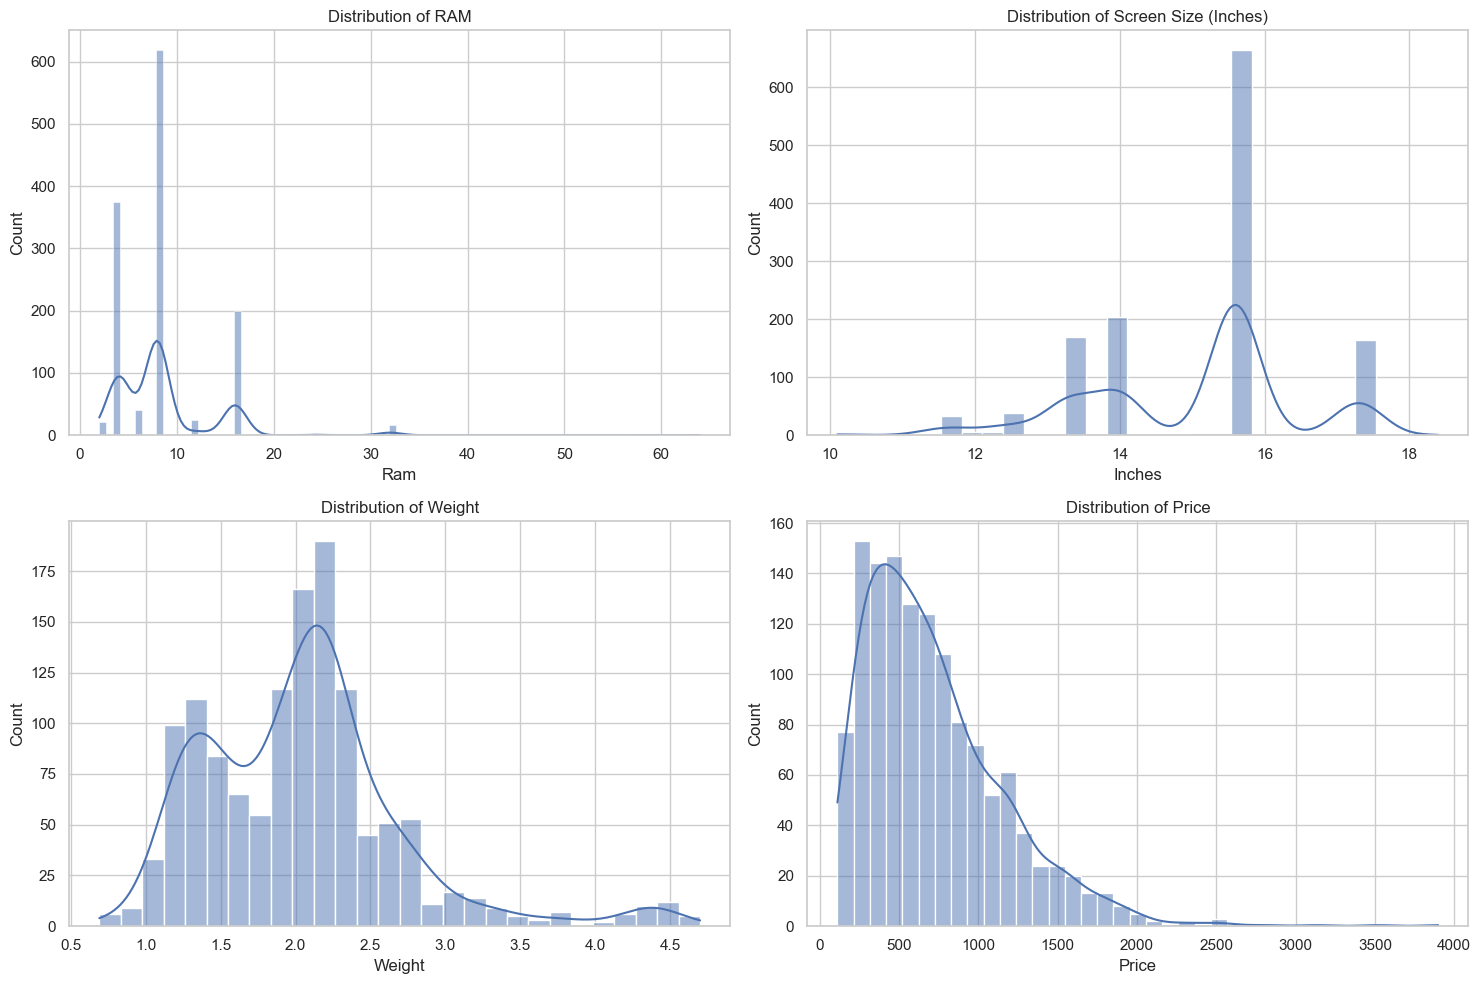

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Creating subplots for various visualizations
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Distribution of RAM
sns.histplot(laptop_data['Ram'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of RAM')

# Distribution of Inches (Screen Size)
sns.histplot(laptop_data['Inches'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Screen Size (Inches)')

# Distribution of Weight
sns.histplot(laptop_data['Weight'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Weight')

# Distribution of Price
sns.histplot(laptop_data['Price'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Price')

plt.tight_layout()
plt.show()

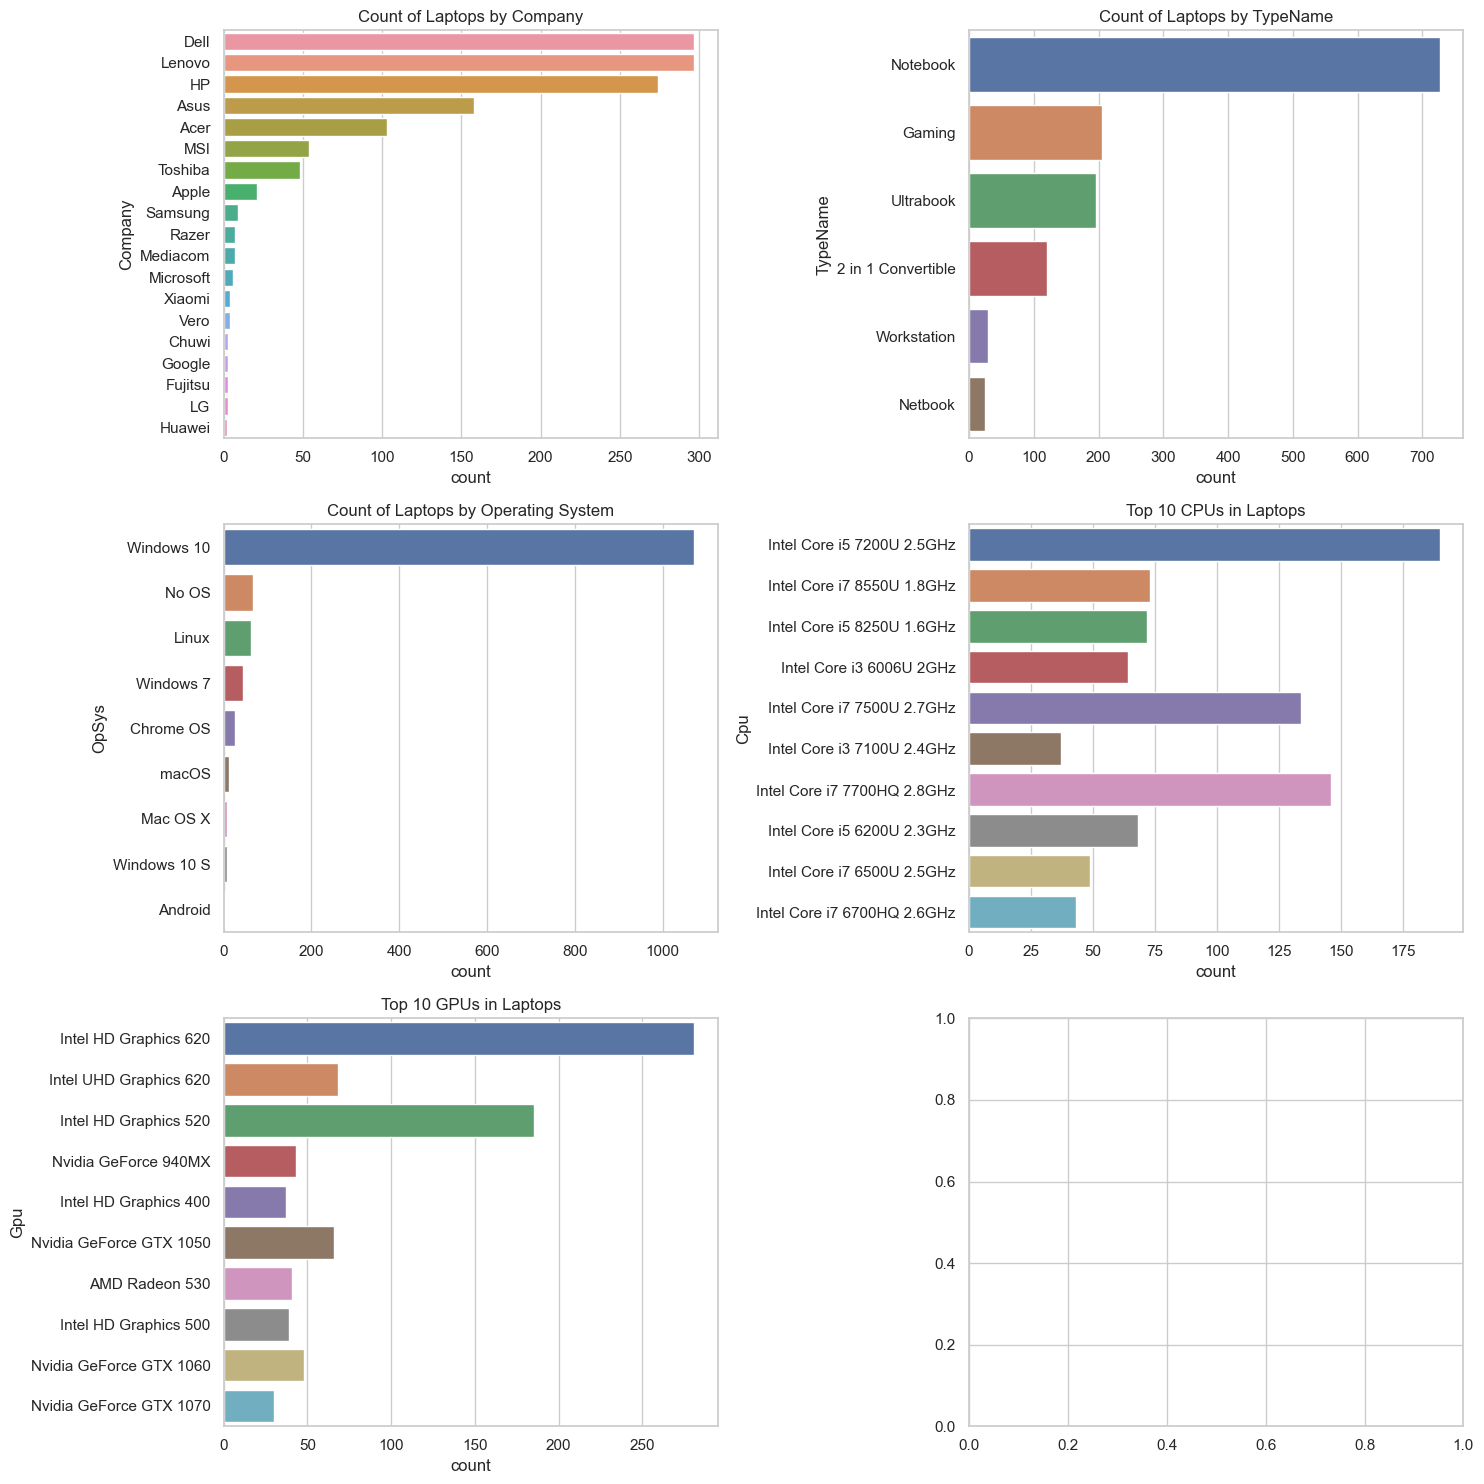

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
Name: count, dtype: int64

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the figure for multiple plots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

# Plotting count distribution of categorical variables
sns.countplot(y='Company', data=laptop_data, order = laptop_data['Company'].value_counts().index, ax=axes[0, 0])
axes[0, 0].set_title('Count of Laptops by Company')

sns.countplot(y='TypeName', data=laptop_data, order = laptop_data['TypeName'].value_counts().index, ax=axes[0, 1])
axes[0, 1].set_title('Count of Laptops by TypeName')

sns.countplot(y='OpSys', data=laptop_data, order = laptop_data['OpSys'].value_counts().index, ax=axes[1, 0])
axes[1, 0].set_title('Count of Laptops by Operating System')

# Due to a large number of unique values, we'll limit the CPU and GPU plots to the top 10
top_cpus = laptop_data['Cpu'].value_counts().index[:10]
sns.countplot(y='Cpu', data=laptop_data[laptop_data['Cpu'].isin(top_cpus)], ax=axes[1, 1])
axes[1, 1].set_title('Top 10 CPUs in Laptops')

top_gpus = laptop_data['Gpu'].value_counts().index[:10]
sns.countplot(y='Gpu', data=laptop_data[laptop_data['Gpu'].isin(top_gpus)], ax=axes[2, 0])
axes[2, 0].set_title('Top 10 GPUs in Laptops')

# Adjust layout
plt.tight_layout()
plt.show()

# Due to the complexity and variety in ScreenResolution, we'll need a different approach to analyze it effectively.
# Let's display the top 10 most common screen resolutions.
top_screen_resolutions = laptop_data['ScreenResolution'].value_counts().head(10)
top_screen_resolutions

In [69]:
# Feature Engineering

# 1. Creating the Touchscreen feature
laptop_data['Touchscreen'] = laptop_data['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0)

# 2. Creating the IPS feature
laptop_data['IPS'] = laptop_data['ScreenResolution'].apply(lambda x: 1 if 'IPS' in x else 0)

# 3. Extracting X and Y Resolution
# First, we extract the resolution part from the ScreenResolution column
resolution = laptop_data['ScreenResolution'].str.extract('(\d+)x(\d+)')
# Then we create new columns for X_Res and Y_Res
laptop_data['X_Res'] = resolution[0].astype(int)
laptop_data['Y_Res'] = resolution[1].astype(int)

# Displaying the first few rows of the updated dataset
laptop_data.head()


,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_Res,Y_Res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,856.5442,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,574.7463,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,367.6320,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,1622.3440,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1153.1500,0,1,2560,1600


In [70]:
df = laptop_data

In [71]:
df['IPS'] = df['ScreenResolution'].apply(
    lambda element:1 if "IPS" in element else 0
)
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_Res,Y_Res
427,Dell,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 7600U 2.8GHz,8,256GB SSD,Intel HD Graphics 620,Linux,1.60,702.6566,0,0,1920,1080
648,Toshiba,Notebook,13.3,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.20,775.5437,0,0,1920,1080
1029,HP,Notebook,17.3,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Nvidia GeForce 930MX,Windows 10,2.63,690.5088,0,0,1920,1080
260,Dell,Notebook,17.3,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8,128GB SSD + 1TB HDD,AMD Radeon 530,Windows 10,2.80,730.1491,0,0,1920,1080
278,Lenovo,Notebook,17.3,1600x900,Intel Core i3 6006U 2GHz,4,1TB HDD,Intel HD Graphics 520,Windows 10,2.80,312.6470,0,0,1600,900


In [72]:
laptop_data = df

In [73]:
# Function to calculate PPI
def calculate_ppi(row):
    return np.sqrt(row['X_Res']**2 + row['Y_Res']**2) / row['Inches']

# Creating the PPI column
laptop_data['PPI'] = laptop_data.apply(calculate_ppi, axis=1)

# Dropping the X_Res and Y_Res columns
laptop_data.drop(columns=['X_Res', 'Y_Res'], inplace=True)

# Checking the first few rows of the updated dataset
laptop_data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,856.5442,0,1,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,574.7463,0,0,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,367.6320,0,0,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,1622.3440,0,1,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1153.1500,0,1,226.983005


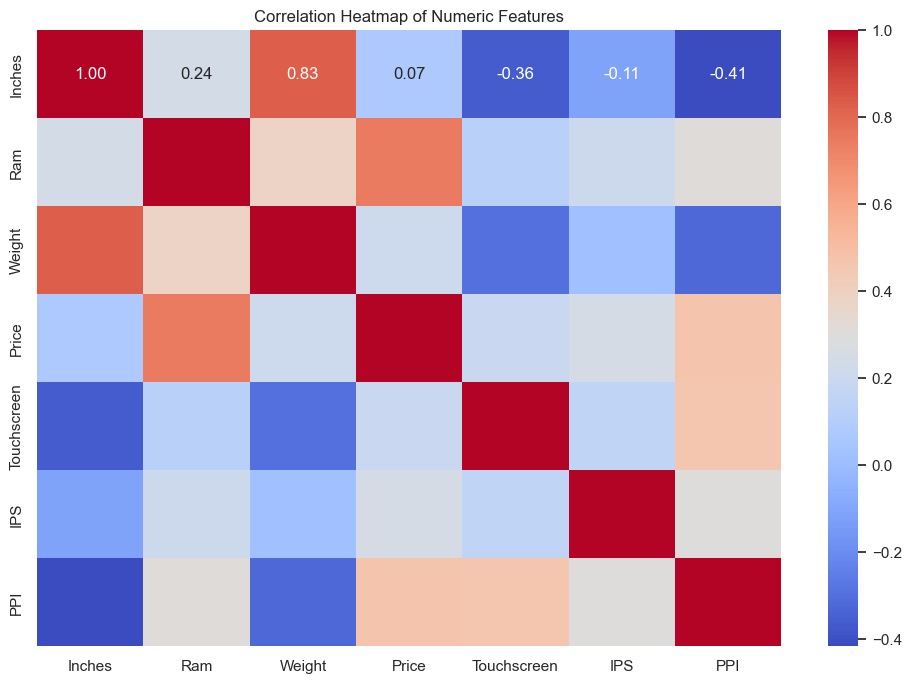

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Selecting numeric features
numeric_data = laptop_data.select_dtypes(include=[np.number])

# Calculating the correlation matrix
corr_matrix = numeric_data.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

In [75]:
corr_matrix = numeric_data.corr()['Price']
corr_matrix 

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
IPS            0.252208
PPI            0.473487
Name: Price, dtype: float64

In [76]:
# Displaying the column names of the dataset
column_names = laptop_data.columns
column_names

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price', 'Touchscreen', 'IPS',
       'PPI'],
      dtype='object')

In [77]:
# Extracting CPU name
laptop_data['CPU_Name'] = laptop_data['Cpu'].str.extract(r'(\bIntel\b.*?|\bAMD\b.*?)\s+\d')

# Checking the first few entries of the new column
print(laptop_data['CPU_Name'].head())

0    Intel Core i5
1    Intel Core i5
2    Intel Core i5
3    Intel Core i7
4    Intel Core i5
Name: CPU_Name, dtype: object


In [78]:
# Dropping the original Cpu column
laptop_data.drop('Cpu', axis=1, inplace=True)

In [79]:
laptop_data.head(10)

,Company,TypeName,Inches,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU_Name
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,856.5442,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,13.3,1440x900,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,574.7463,0,0,127.677940,Intel Core i5
2,HP,Notebook,15.6,Full HD 1920x1080,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,367.6320,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,1622.3440,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1153.1500,0,1,226.983005,Intel Core i5
5,Acer,Notebook,15.6,1366x768,4,500GB HDD,AMD Radeon R5,Windows 10,2.10,255.7440,0,0,100.454670,AMD A9-Series
6,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04,1368.2110,0,1,220.534624,Intel Core i7
7,Apple,Ultrabook,13.3,1440x900,8,256GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,740.8264,0,0,127.677940,Intel Core i5
8,Asus,Ultrabook,14.0,Full HD 1920x1080,16,512GB SSD,Nvidia GeForce MX150,Windows 10,1.30,955.8432,0,0,157.350512,Intel Core i7
9,Acer,Ultrabook,14.0,IPS Panel Full HD 1920x1080,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.60,492.3072,0,1,157.350512,Intel Core i5


In [80]:
import re

# Function to convert storage size to integer in GB
def size_to_gb(size_str):
    size_match = re.search(r'(\d+\.?\d*)', size_str)
    if size_match:
        size = float(size_match.group(1))
        if 'TB' in size_str:
            return int(size * 1024)  # Convert TB to GB
        return int(size)
    return 0

# Function to update the storage columns
def update_storage(row):
    storage_entries = row['Memory'].split("+")
    for entry in storage_entries:
        if 'HDD' in entry:
            row['HDD'] += size_to_gb(entry)
        elif 'SSD' in entry:
            row['SSD'] += size_to_gb(entry)
        elif 'Flash Storage' in entry:
            row['Flash Storage'] += size_to_gb(entry)
        elif 'Hybrid' in entry:
            row['Hybrid'] += size_to_gb(entry)
    return row

# Initialize new columns for storage types
laptop_data['HDD'] = 0
laptop_data['SSD'] = 0
laptop_data['Flash Storage'] = 0
laptop_data['Hybrid'] = 0

# Apply the function to each row
laptop_data = laptop_data.apply(update_storage, axis=1)

# Display the first few rows to verify the changes
laptop_data.sample(5)

,Company,TypeName,Inches,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU_Name,HDD,SSD,Flash Storage,Hybrid
872,Toshiba,Notebook,15.6,IPS Panel Full HD 1920x1080,8,256GB SSD,Intel HD Graphics 620,Windows 10,2.00,887.4317,0,1,141.211998,Intel Core i7,0,256,0,0
442,Lenovo,Ultrabook,12.5,IPS Panel Full HD 1920x1080,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.36,913.6454,0,1,176.232574,Intel Core i5,0,256,0,0
1139,HP,Ultrabook,15.6,Full HD 1920x1080,8,256GB SSD,Intel HD Graphics 520,Windows 7,1.88,1388.5110,0,0,141.211998,Intel Core i7,0,256,0,0
443,Lenovo,Notebook,15.6,Full HD 1920x1080,4,128GB SSD,Intel HD Graphics 505,Windows 10,2.20,223.1366,0,0,141.211998,Intel Pentium Quad Core N4200,0,128,0,0
805,HP,Netbook,12.5,1366x768,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.26,888.0710,0,0,125.367428,Intel Core i5,0,256,0,0


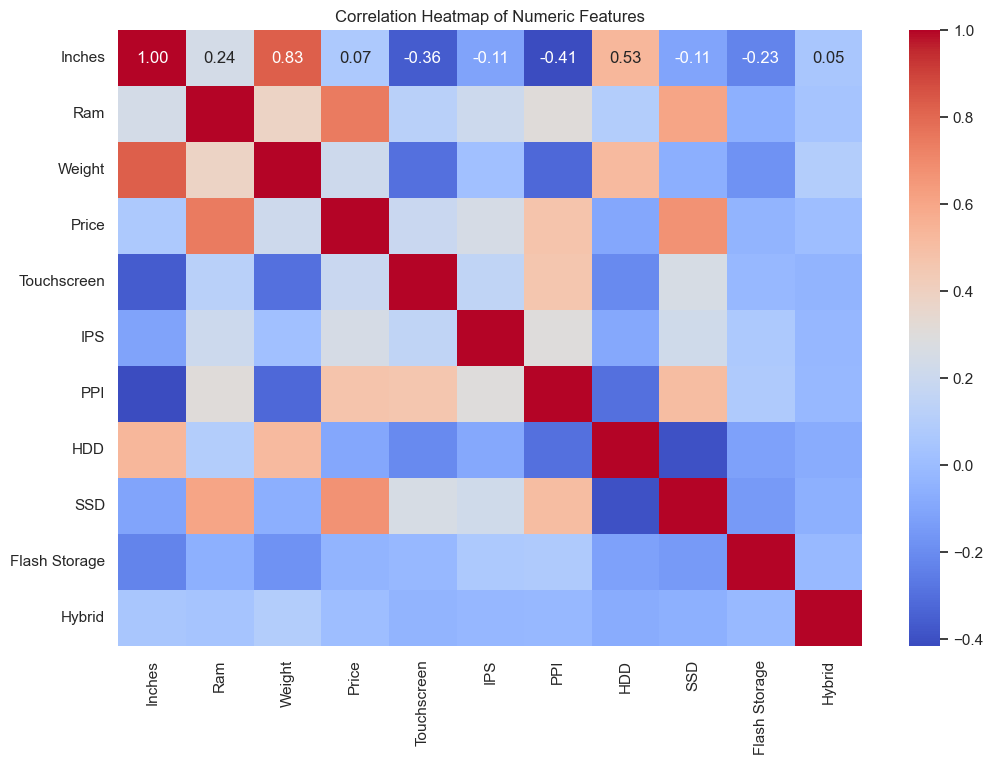

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Selecting numeric features
numeric_data = laptop_data.select_dtypes(include=[np.number])

# Calculating the correlation matrix
corr_matrix = numeric_data.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

In [82]:
corr_matrix = numeric_data.corr()['Price']
corr_matrix 

Inches           0.068197
Ram              0.743007
Weight           0.210370
Price            1.000000
Touchscreen      0.191226
IPS              0.252208
PPI              0.473487
HDD             -0.094856
SSD              0.670682
Flash Storage   -0.040511
Hybrid           0.008011
Name: Price, dtype: float64

In [83]:
# Function to categorize the operating system
def categorize_os(os_str):
    if 'Windows' in os_str:
        return 'Windows'
    elif 'Linux' in os_str or 'Ubuntu' in os_str:
        return 'Linux'
    elif 'macOS' in os_str or 'Mac OS' in os_str:
        return 'Apple'
    else:
        return 'Other OS'

# Creating the new column
laptop_data['OpSys_Simple'] = laptop_data['OpSys'].apply(categorize_os)

# Display the first few rows to verify the changes
print(laptop_data[['OpSys', 'OpSys_Simple']].head())

   OpSys OpSys_Simple
0  macOS        Apple
1  macOS        Apple
2  No OS     Other OS
3  macOS        Apple
4  macOS        Apple


In [84]:
laptop_data.head()

,Company,TypeName,Inches,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU_Name,HDD,SSD,Flash Storage,Hybrid,OpSys_Simple
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,856.5442,0,1,226.983005,Intel Core i5,0,128,0,0,Apple
1,Apple,Ultrabook,13.3,1440x900,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,574.7463,0,0,127.677940,Intel Core i5,0,0,128,0,Apple
2,HP,Notebook,15.6,Full HD 1920x1080,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,367.6320,0,0,141.211998,Intel Core i5,0,256,0,0,Other OS
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,1622.3440,0,1,220.534624,Intel Core i7,0,512,0,0,Apple
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1153.1500,0,1,226.983005,Intel Core i5,0,256,0,0,Apple


In [85]:
# Dropping the specified columns
columns_to_drop = ['ScreenResolution', 'Memory', 'Gpu', 'Flash Storage', 'Hybrid', 'Memory Size']
laptop_data.drop(columns=columns_to_drop, errors='ignore', inplace=True)

# Displaying the first few rows of the updated dataset
laptop_data.head()

,Company,TypeName,Inches,Ram,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU_Name,HDD,SSD,OpSys_Simple
0,Apple,Ultrabook,13.3,8,macOS,1.37,856.5442,0,1,226.983005,Intel Core i5,0,128,Apple
1,Apple,Ultrabook,13.3,8,macOS,1.34,574.7463,0,0,127.677940,Intel Core i5,0,0,Apple
2,HP,Notebook,15.6,8,No OS,1.86,367.6320,0,0,141.211998,Intel Core i5,0,256,Other OS
3,Apple,Ultrabook,15.4,16,macOS,1.83,1622.3440,0,1,220.534624,Intel Core i7,0,512,Apple
4,Apple,Ultrabook,13.3,8,macOS,1.37,1153.1500,0,1,226.983005,Intel Core i5,0,256,Apple


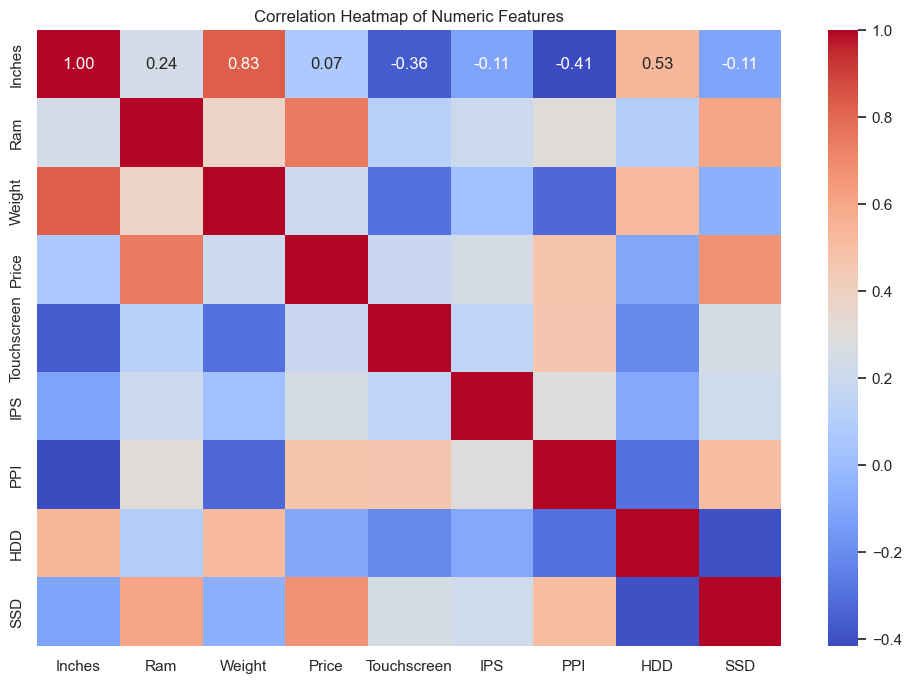

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Selecting numeric features
numeric_data = laptop_data.select_dtypes(include=[np.number])

# Calculating the correlation matrix
corr_matrix = numeric_data.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

In [87]:
corr_matrix = numeric_data.corr()['Price']
corr_matrix 

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
IPS            0.252208
PPI            0.473487
HDD           -0.094856
SSD            0.670682
Name: Price, dtype: float64

## Normalization and Column Transformer

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Define target and features
X = laptop_data.drop('Price', axis=1)
y = np.log(laptop_data['Price']) # Log normalization of the Price

# Handling categorical variables
categorical_features = X.select_dtypes(include=['object']).columns
column_transformer = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)],
    remainder='passthrough')

X_transformed = column_transformer.fit_transform(X)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

## 1. Linear Regression


Linear regression models the relationship between a dependent variable Y and one or more independent variables X using a linear function.

**Formula:**
\begin{equation}
Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_nX_n + \epsilon
\end{equation}

In [89]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

# Evaluating Linear Regression
lr_mae = mean_absolute_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)
print("Linear Regression MAE:", lr_mae)
print("Linear Regression R²:", lr_r2)

Linear Regression MAE: 0.18890280890682576
Linear Regression R²: 0.8382794222750387


## 2. Ridge Regression



Ridge Regression is a technique for analyzing multiple regression data that suffer from multicollinearity. It includes a penalty term to regularize the coefficients.

**Formula:**
\begin{equation}
\text{Minimize} \left( \sum_{i=1}^{n} (Y_i - \sum_{j=1}^{p} X_{ij} \beta_j)^2 + \lambda \sum_{j=1}^{p} \beta_j^2 \right)
\end{equation}

In [90]:
from sklearn.linear_model import Ridge

# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
ridge_predictions = ridge_model.predict(X_test)

# Evaluating Ridge Regression
ridge_mae = mean_absolute_error(y_test, ridge_predictions)
ridge_r2 = r2_score(y_test, ridge_predictions)
print("Ridge Regression MAE:", ridge_mae)
print("Ridge Regression R²:", ridge_r2)

Ridge Regression MAE: 0.18785346684318996
Ridge Regression R²: 0.8374609858476576


## 3. Lasso Regression 



Lasso (Least Absolute Shrinkage and Selection Operator) Regression is similar to Ridge but uses absolute values in the penalty.

**Formula:**
\begin{equation}
\text{Minimize} \left( \sum_{i=1}^{n} (Y_i - \sum_{j=1}^{p} X_{ij} \beta_j)^2 + \lambda \sum_{j=1}^{p} |\beta_j| \right)
\end{equation}

In [91]:
from sklearn.linear_model import Lasso

# Lasso
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
lasso_predictions = lasso_model.predict(X_test)

# Evaluating Lasso
lasso_mae = mean_absolute_error(y_test, lasso_predictions)
lasso_r2 = r2_score(y_test, lasso_predictions)
print("Lasso MAE:", lasso_mae)
print("Lasso R²:", lasso_r2)

Lasso MAE: 0.3056926602830944
Lasso R²: 0.6043367296247257


## 4. Decision Tree Regressor 



Decision trees use a tree-like model of decisions. It’s not typically expressed in a simple mathematical formula but uses a set of binary rules to partition the data and predict the target variable.


In [92]:
from sklearn.tree import DecisionTreeRegressor

# Decision Tree
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)

# Evaluating Decision Tree
dt_mae = mean_absolute_error(y_test, dt_predictions)
dt_r2 = r2_score(y_test, dt_predictions)
print("Decision Tree MAE:", dt_mae)
print("Decision Tree R²:", dt_r2)

Decision Tree MAE: 0.18697080727295376
Decision Tree R²: 0.8154700872322576


## 5. Romdom Forest 

Random Forest is an ensemble of Decision Trees, generally trained with the "bagging" method. The basic idea is to combine multiple decision trees in determining the final output rather than relying on individual decision trees.

**Concept:**
- It works by constructing a multitude of decision trees at training time.
- For regression tasks, the output is the average prediction of the individual trees.

Random Forest and Decision Trees are more algorithmic models and don't have a simple equation like linear, Ridge, or Lasso regression. They are typically visualized as a series of decision splits based on the data features.

In [93]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Initialize the Random Forest model
random_forest_model = RandomForestRegressor(random_state=42)

# Fit the model to the training data
random_forest_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = random_forest_model.predict(X_test)

# Calculate MAE and R-squared
mae = mean_absolute_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R²):", r_squared)


Mean Absolute Error (MAE): 0.1553970399238474
R-squared (R²): 0.8802059898162746


--------------------------------------------------------

## 1. Preparing the Data



- **Defining Target and Features**: 
  - The `Price` column is set as the target variable (`y`), which is what we want to predict.
  - The rest of the columns form the features (`X`), which are the inputs used to predict the price.

- **Log Normalization of the Price**: 
  - Applying `np.log` to the `Price` column helps in normalizing the data. This is particularly useful when the target variable is skewed, as log transformation can help stabilize variance and make the data more 'normal' (Gaussian).

- **Handling Categorical Variables**: 
  - `ColumnTransformer` is used along with `OneHotEncoder` to convert categorical variables into a format that can be used by the machine learning models. This is necessary because most models cannot handle categorical variables directly.

- **Splitting the Dataset**:
  - The dataset is split into training (`X_train`, `y_train`) and testing (`X_test`, `y_test`) sets. The model will be trained on the training set and evaluated on thr data and can provide reliable predictions.

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Define target and features
X = laptop_data.drop('Price', axis=1)
y = np.log(laptop_data['Price']) # Log normalization of the Price

# Handling categorical variables
categorical_features = X.select_dtypes(include=['object']).columns
column_transformer = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)],
    remainder='passthrough')

X_transformed = column_transformer.fit_transform(X)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

## 2. Model Selection and Parameter Tuning

- **Initializing Models**: 
  - Several regression models are initialized, including Linear Regression, Decision Tree, and Random Forest. This variety helps in comparing different models to see which performs best for this dataset.

- **Parameter Tuning**: 
  - For models like Random Forest, parameter tuning is done using `GridSearchCV`, which searches through a specified parameter grid to find the combination of parameters that gives the best performance.

In [95]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42)
}

# Adjusted parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2'],  
    'max_depth': [10, 20, 30]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_rf_model = grid_search.best_estimator_

## 3. Model Evaluation

- **Evaluating Models**: 
  - Each model is trained on the training set and then used to predict the prices on the testing set. The performance is measured using the Root Mean Squared Error (RMSE), which provides an indication of how well the model predicts the price.

- **Plotting for Decision Tree**: 
  - The `cost_complexity_pruning_path` is used for the Decision Tree to determine the effective alpha (complexity parameter) for pruning the tree. The accuracy is plotted against different values of alpha to find the best trade-off between model simplicity and accuracy.

- **Visualizing the Tree**: 
  - The `plot_tree` function is used to visualize the decision tree. This helps in understanding how the model is making predictions.


Linear Regression RMSE: 0.23941088975932479
Decision Tree RMSE: 0.26074440758417916
Random Forest RMSE: 0.20605293755863255


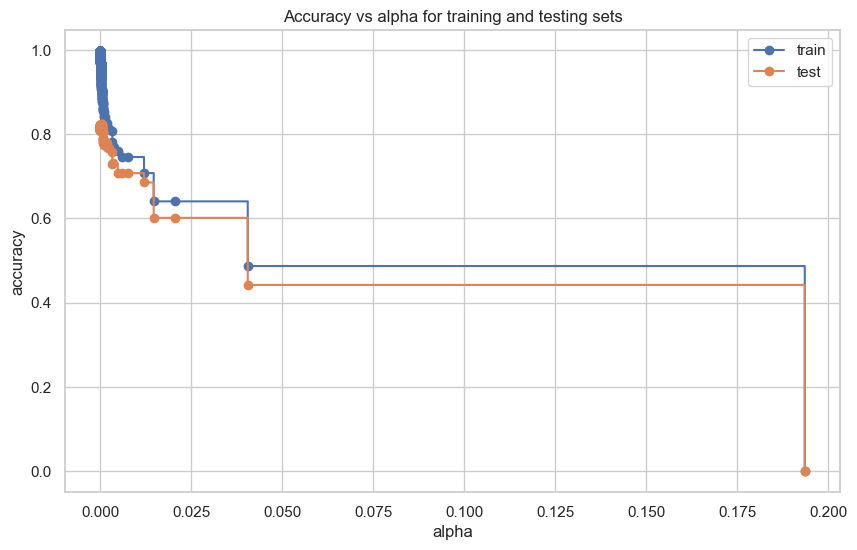

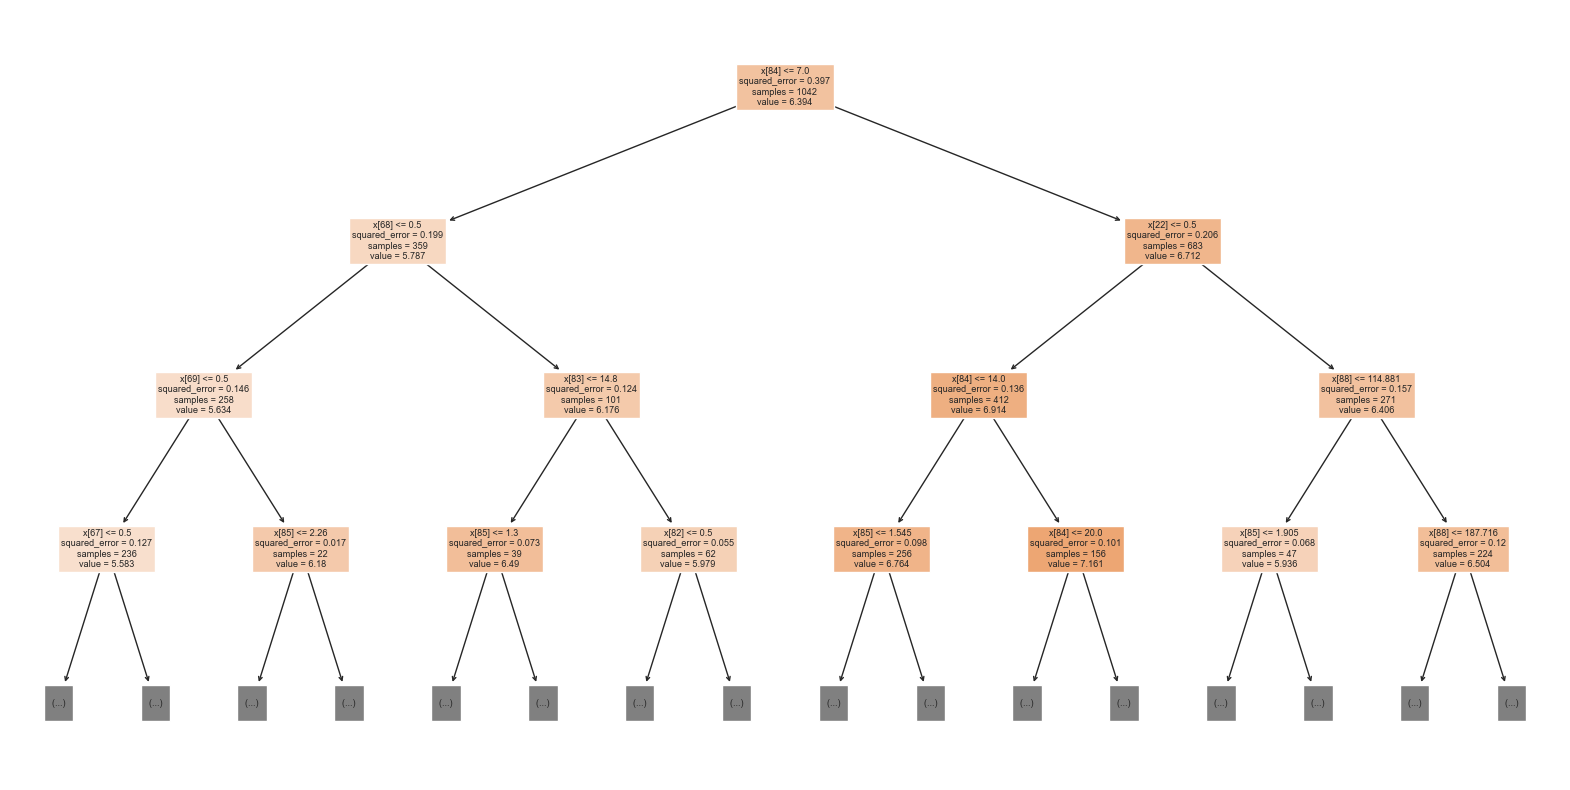

In [96]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Evaluate models`a
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")

# Plotting for Decision Tree (example)
decision_tree = models['Decision Tree']
path = decision_tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Plotting the ccp_alpha vs accuracy
train_scores = []
test_scores = []
for ccp_alpha in ccp_alphas:
    dt = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    dt.fit(X_train, y_train)
    train_scores.append(dt.score(X_train, y_train))
    test_scores.append(dt.score(X_test, y_test))

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, train_scores, marker='o', label='train', drawstyle="steps-post")
plt.plot(ccp_alphas, test_scores, marker='o', label='test', drawstyle="steps-post")
plt.xlabel('alpha')
plt.ylabel('accuracy')
plt.title('Accuracy vs alpha for training and testing sets')
plt.legend()
plt.show()

# Plotting the tree
plt.figure(figsize=(20,10))
plot_tree(decision_tree, filled=True, max_depth=3)
plt.show()

## 4. Final Model Prediction and Plotting


- **Predicting with the Best Model**: 
  - The best-performing Random Forest model (obtained from parameter tuning) is used to predict the prices for the entire dataset. The predicted prices are stored in a new column `Predicted Price`.

- **Plotting Actual vs. Predicted Prices**: 
  - A scatter plot is used to compare the actual prices with the predicted prices. This visual representation helps in assessing the model's accuracy and understanding how closely the predictions match the actual values.



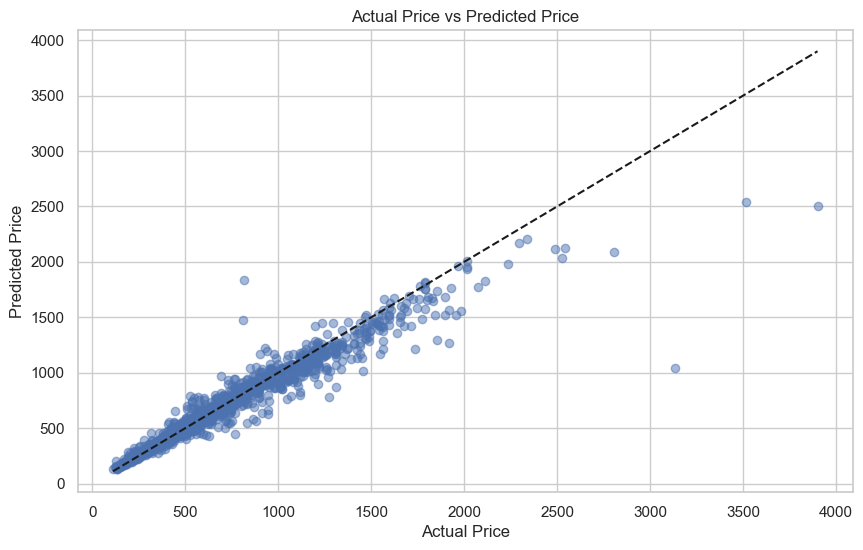

In [97]:
# Predicting using the best Random Forest model
laptop_data['Predicted Price'] = np.exp(best_rf_model.predict(X_transformed)) # Inverse of log transformation

# Plotting actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(laptop_data['Price'], laptop_data['Predicted Price'], alpha=0.5)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.plot([laptop_data['Price'].min(), laptop_data['Price'].max()], [laptop_data['Price'].min(), laptop_data['Price'].max()], 'k--')
plt.show()

C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


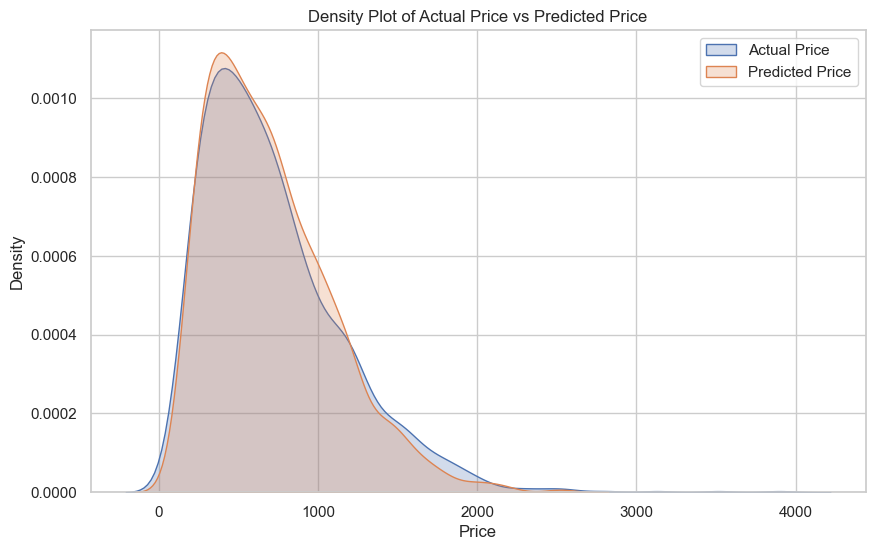

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the density plot for actual and predicted prices using updated seaborn functions
plt.figure(figsize=(10, 6))
sns.kdeplot(laptop_data['Price'], fill=True, label='Actual Price')
sns.kdeplot(laptop_data['Predicted Price'], fill=True, label='Predicted Price')

plt.title('Density Plot of Actual Price vs Predicted Price')
plt.xlabel('Price')
plt.ylabel('Density')
plt.legend()

plt.show()

In [99]:
laptop_data[['Price', 'Predicted Price']]

,Price,Predicted Price
0,856.5442,866.919018
1,574.7463,666.982092
2,367.6320,387.615295
3,1622.3440,1676.395499
4,1153.1500,1002.975489
...,...,...
1298,407.9117,418.971876
1299,958.4006,974.592670
1300,146.4134,148.852758
1301,488.4710,481.475130


---------------------------------------------------

\begin{equation}
**Thank You**
\end{equation}

---------------------------------------------------

### $End$

In [101]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Assuming these are your categorical columns after renaming 'OpSys' to 'OpSys_Simple'
categorical_features = ['Company', 'TypeName', 'CPU_Name', 'OpSys_Simple']  # Update as per your dataset

# Configure your ColumnTransformer
column_transformer = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
], remainder='passthrough')

In [102]:
# Correct column names in your input data DataFrame
input_data = pd.DataFrame({
    'Company': ['Dell'],
    'TypeName': ['Ultrabook'],
    'Inches': [15.6],
    'Touchscreen': [0],
    'IPS': [1],
    'PPI': [141],
    'CPU_Name': ['Intel Core i7'],
    'Ram': [16],
    'Weight': [1.8],
    'OpSys_Simple': ['Windows'],  # Corrected column name
    'HDD': [0],
    'SSD': [512]
})


In [103]:
# Example of typo checking
assert 'OpSys_Simple' in laptop_data.columns, "Column 'OpSys_Simple' does not exist in your dataset."

In [104]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor

# Assuming this is your preprocessed and trained model setup
column_names = ['Company', 'TypeName', 'Inches', 'Touchscreen', 'IPS', 'PPI', 'CPU_Name', 'Ram', 'Weight', 'OpSys_Simple', 'HDD', 'SSD']
column_transformer = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore'), ['Company', 'TypeName', 'CPU_Name', 'OpSys_Simple'])
], remainder='passthrough')

# Assuming your model is already trained with the correct column names
# best_rf_model = train_your_model(...)

def predict_laptop_price(input_data):
    # Transforming the input data using the column transformer
    input_transformed = column_transformer.transform(input_data)
    
    # Predicting the price with the Random Forest model
    predicted_log_price = best_rf_model.predict(input_transformed)
    predicted_price = np.exp(predicted_log_price)  # Inverse of log transformation
    
    return predicted_price

# Example input data for prediction
input_data_example = pd.DataFrame([{
    'Company': 'Dell',
    'TypeName': 'Ultrabook',
    'Inches': 15.6,
    'Touchscreen': 0,
    'IPS': 1,
    'PPI': 141,
    'CPU_Name': 'Intel Core i7',
    'Ram': 16,
    'Weight': 1.8,
    'OpSys_Simple': 'Windows',
    'HDD': 0,
    'SSD': 512
}], columns=column_names)


In [105]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

# Create a mock dataset
data = {
    'Company': ['Dell', 'Apple', 'HP', 'Dell', 'Apple'],
    'TypeName': ['Ultrabook', 'Notebook', 'Gaming', 'Ultrabook', 'Ultrabook'],
    'Inches': [15.6, 13.3, 15.6, 14, 13.3],
    'Touchscreen': [0, 0, 1, 0, 1],
    'IPS': [1, 0, 0, 1, 1],
    'PPI': [141, 227, 141, 157, 227],
    'CPU_Name': ['Intel Core i7', 'Intel Core i5', 'AMD Ryzen 7', 'Intel Core i7', 'Intel Core i5'],
    'Ram': [16, 8, 16, 8, 8],
    'Weight': [1.8, 1.37, 2.2, 1.6, 1.34],
    'OpSys_Simple': ['Windows', 'macOS', 'Windows', 'Windows', 'macOS'],
    'HDD': [0, 0, 512, 0, 0],
    'SSD': [512, 256, 0, 256, 512],
    'Price': [1200, 1500, 1100, 1000, 1300]
}

df = pd.DataFrame(data)

In [106]:
# Define target and features
X = df.drop('Price', axis=1)
y = np.log(df['Price'])  # Log transformation of the Price for normalization

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handling categorical variables with OneHotEncoder and ColumnTransformer
categorical_features = ['Company', 'TypeName', 'CPU_Name', 'OpSys_Simple']
column_transformer = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
], remainder='passthrough')

In [107]:
# Define the RandomForestRegressor within a pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', column_transformer),
    ('model', RandomForestRegressor(random_state=42))
])

# Train the model
pipeline.fit(X_train, y_train)

# Evaluate the model
y_pred = pipeline.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Test RMSE: {rmse:.2f}")


Test RMSE: 0.29


In [108]:
def predict_laptop_price(input_data):
    # Predicting the price with the trained pipeline
    predicted_log_price = pipeline.predict(input_data)
    predicted_price = np.exp(predicted_log_price)  # Inverse of log transformation
    return predicted_price

# Assuming input_data_example is defined as shown in the previous example
predicted_price = predict_laptop_price(input_data_example)
print(f"Predicted Laptop Price: ${predicted_price[0]:.2f}")

Predicted Laptop Price: $1157.65


In [109]:
def predict_laptop_price_with_user_input():
    # User input for each feature
    company = input("Enter laptop company: ")
    type_name = input("Enter type name (Ultrabook, Notebook, etc.): ")
    inches = float(input("Enter screen size in inches: "))
    touchscreen = int(input("Touchscreen (1 for Yes, 0 for No): "))
    ips = int(input("IPS panel (1 for Yes, 0 for No): "))
    ppi = float(input("Pixels Per Inch: "))
    cpu_name = input("Enter CPU name (Intel Core i7, AMD Ryzen, etc.): ")
    ram = int(input("Enter RAM in GB: "))
    weight = float(input("Enter weight in kg: "))
    opsys_simple = input("Enter simplified OS (Windows, Linux, Apple): ")
    hdd = int(input("Enter HDD size in GB (if any, else 0): "))
    ssd = int(input("Enter SSD size in GB (if any, else 0): "))
    
    # Creating a DataFrame for the input
    input_data = pd.DataFrame({
        'Company': [company],
        'TypeName': [type_name],
        'Inches': [inches],
        'Touchscreen': [touchscreen],
        'IPS': [ips],
        'PPI': [ppi],
        'CPU_Name': [cpu_name],
        'Ram': [ram],
        'Weight': [weight],
        'OpSys_Simple': [opsys_simple],
        'HDD': [hdd],
        'SSD': [ssd]
    })
    
    # Predicting the price with the trained pipeline
    predicted_log_price = pipeline.predict(input_data)
    predicted_price = np.exp(predicted_log_price)  # Inverse of log transformation
    
    print(f"Predicted Laptop Price: ${predicted_price[0]:.2f}")

In [111]:
# Call the function to start the user input prediction process
predict_laptop_price_with_user_input()

Enter laptop company:  Dell
Enter type name (Ultrabook, Notebook, etc.):  Ultrabook
Enter screen size in inches:  15.6
Touchscreen (1 for Yes, 0 for No):  0
IPS panel (1 for Yes, 0 for No):  1
Pixels Per Inch:  141
Enter CPU name (Intel Core i7, AMD Ryzen, etc.):  Intel Core i7
Enter RAM in GB:  16
Enter weight in kg:  1.8
Enter simplified OS (Windows, Linux, Apple):  Window
Enter HDD size in GB (if any, else 0):  0
Enter SSD size in GB (if any, else 0):  512


Predicted Laptop Price: $1172.40


In [112]:
import joblib

# Assuming your pipeline variable is named `pipeline`
joblib.dump(pipeline, 'laptop_price_predictor.pkl')

['laptop_price_predictor.pkl']